# Basic Zoom Data Manipulation

This notebook is (was) used to develop algorithms to calculate several time series plots - the number of people attending and the number of unique visitors as a function of time.

The code from here has been moved into files and methods that can be used by other compontents, notebooks, etc.

## Setup

In [25]:
from pathlib import Path
import os
import sys
sys.path.append(f'{Path(os.getcwd()) / ".."}')

from collections import defaultdict

from zoom_data import load_zoom_data

In [26]:
test_file = Path('../../snowmass-cpm-data/participants_98029432588.csv')

## Load

In [27]:
zoom_data = load_zoom_data(test_file)

## Unique Users

Try to calculate the number of people per time.

In [30]:
already_seen = set()
joining = defaultdict(int)
for index, row in zoom_data.coming_and_going.iterrows():
    name = row.Name
    if row['Name'] not in already_seen:
        already_seen.add(name)
        joining[row.Join] += 1

In [33]:
len(already_seen), len(joining), sum(v for v in joining.values())

(1623, 1192, 1623)

In [29]:
joining

defaultdict(int,
            {Timestamp('2020-10-05 10:58:03'): 2,
             Timestamp('2020-10-05 10:58:05'): 1,
             Timestamp('2020-10-05 10:58:07'): 1,
             Timestamp('2020-10-05 10:58:09'): 1,
             Timestamp('2020-10-05 10:58:11'): 1,
             Timestamp('2020-10-05 10:58:12'): 2,
             Timestamp('2020-10-05 10:58:13'): 1,
             Timestamp('2020-10-05 10:58:14'): 1,
             Timestamp('2020-10-05 10:58:16'): 3,
             Timestamp('2020-10-05 10:58:17'): 3,
             Timestamp('2020-10-05 10:58:18'): 1,
             Timestamp('2020-10-05 10:58:21'): 1,
             Timestamp('2020-10-05 10:58:22'): 1,
             Timestamp('2020-10-05 10:58:23'): 1,
             Timestamp('2020-10-05 10:58:24'): 2,
             Timestamp('2020-10-05 10:58:25'): 2,
             Timestamp('2020-10-05 10:58:27'): 2,
             Timestamp('2020-10-05 10:58:28'): 2,
             Timestamp('2020-10-05 10:58:29'): 5,
             Timestamp('2020-10-0

In [35]:
running_total = dict(joining)
count = 0
for k in sorted(running_total.keys()):
    count += running_total[k]
    running_total[k] = count

In [36]:
count

1623

In [37]:
running_total

{Timestamp('2020-10-05 10:58:03'): 372,
 Timestamp('2020-10-05 10:58:05'): 374,
 Timestamp('2020-10-05 10:58:07'): 375,
 Timestamp('2020-10-05 10:58:09'): 376,
 Timestamp('2020-10-05 10:58:11'): 377,
 Timestamp('2020-10-05 10:58:12'): 379,
 Timestamp('2020-10-05 10:58:13'): 380,
 Timestamp('2020-10-05 10:58:14'): 381,
 Timestamp('2020-10-05 10:58:16'): 384,
 Timestamp('2020-10-05 10:58:17'): 387,
 Timestamp('2020-10-05 10:58:18'): 388,
 Timestamp('2020-10-05 10:58:21'): 389,
 Timestamp('2020-10-05 10:58:22'): 390,
 Timestamp('2020-10-05 10:58:23'): 391,
 Timestamp('2020-10-05 10:58:24'): 393,
 Timestamp('2020-10-05 10:58:25'): 395,
 Timestamp('2020-10-05 10:58:27'): 397,
 Timestamp('2020-10-05 10:58:28'): 399,
 Timestamp('2020-10-05 10:58:29'): 404,
 Timestamp('2020-10-05 10:58:30'): 407,
 Timestamp('2020-10-05 10:58:31'): 409,
 Timestamp('2020-10-05 10:58:32'): 412,
 Timestamp('2020-10-05 10:58:34'): 415,
 Timestamp('2020-10-05 10:58:35'): 416,
 Timestamp('2020-10-05 10:58:36'): 417,


2020-10-05 08:50:44 2020-10-05 16:04:25


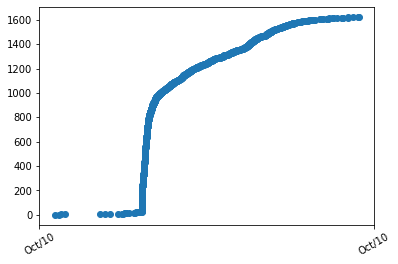

In [38]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import numpy as np

start_date = min(running_total.keys())
end_date = max(running_total.keys())
print (start_date, end_date)

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%h/%m')
delta = datetime.timedelta(hours=1)

dates = sorted(running_total.keys())
people = [running_total[k] for k in dates]

fig, ax = plt.subplots()
plt.plot_date(dates, people)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()

## Running Attendance

This is how many people are attending at a particular time.

In [12]:
joining = defaultdict(int)
leaving = defaultdict(int)
for index, row in zoom_data.coming_and_going.iterrows():
    name = row.Name
    joining[row.Join] += 1
    leaving[row.Leave] -= 1

In [15]:
all_keys = sorted(list(joining.keys()) + list(leaving.keys()))

In [21]:
running_attendance = defaultdict(int)
count = 0
for k in all_keys:
    if k in joining:
        count += joining[k]
    if k in leaving:
        count += leaving[k]
    running_attendance[k] = count

In [22]:
running_attendance

defaultdict(int,
            {Timestamp('2020-10-06 08:40:47'): 1,
             Timestamp('2020-10-06 08:42:03'): 2,
             Timestamp('2020-10-06 08:42:07'): 3,
             Timestamp('2020-10-06 08:46:10'): 4,
             Timestamp('2020-10-06 08:49:24'): 5,
             Timestamp('2020-10-06 08:49:27'): 4,
             Timestamp('2020-10-06 08:53:25'): 5,
             Timestamp('2020-10-06 08:54:31'): 6,
             Timestamp('2020-10-06 08:55:04'): 7,
             Timestamp('2020-10-06 08:55:31'): 8,
             Timestamp('2020-10-06 08:55:50'): 9,
             Timestamp('2020-10-06 08:55:56'): 10,
             Timestamp('2020-10-06 08:56:03'): 9,
             Timestamp('2020-10-06 08:56:04'): 11,
             Timestamp('2020-10-06 08:56:13'): 12,
             Timestamp('2020-10-06 08:56:18'): 13,
             Timestamp('2020-10-06 08:56:30'): 14,
             Timestamp('2020-10-06 08:56:35'): 15,
             Timestamp('2020-10-06 08:56:36'): 16,
             Timestamp('20

2020-10-06 08:40:47 2020-10-06 14:18:47


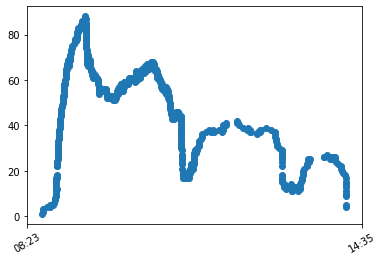

In [24]:
start_date = min(running_attendance.keys())
end_date = max(running_attendance.keys())
print (start_date, end_date)

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%H:%M')
delta = datetime.timedelta(hours=1)

dates = sorted(running_attendance.keys())
people = [running_attendance[k] for k in dates]

fig, ax = plt.subplots()
plt.plot_date(dates, people)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()